In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('wine.csv')

EDA EXPLORE

In [ ]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.tail()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [ ]:
df.shape

(178, 14)

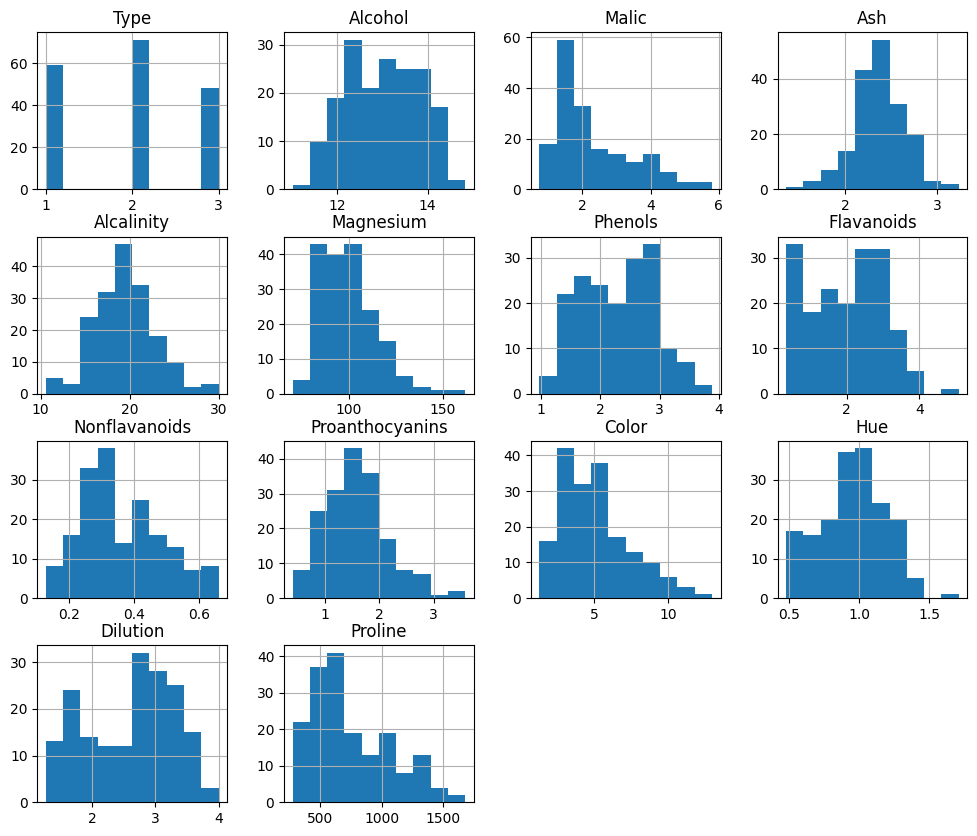

In [ ]:
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10))  # Histogram for each feature
plt.show()




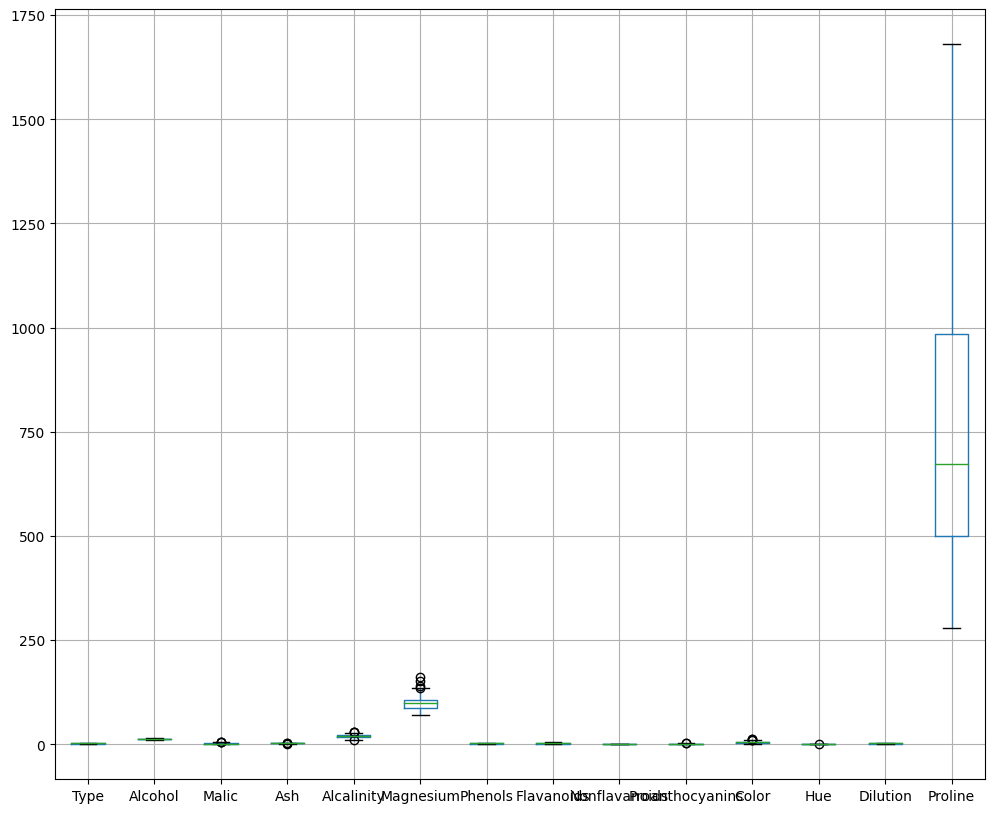

In [ ]:
df.boxplot(figsize=(12, 10))  # Box plot
plt.show()

3:Investigate correlations between features:

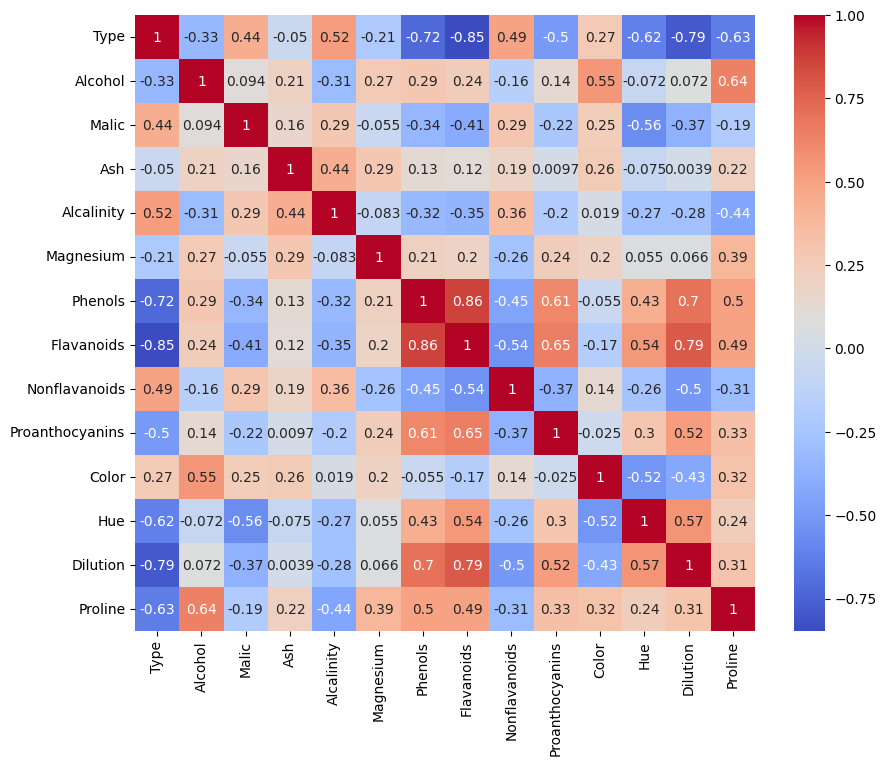

In [ ]:
import seaborn as sns
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


Task 2: Dimensionality Reduction with PCA

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


2:Implement PCA:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_data = pca.fit_transform(scaled_data)


3:Determine the optimal number of principal components:

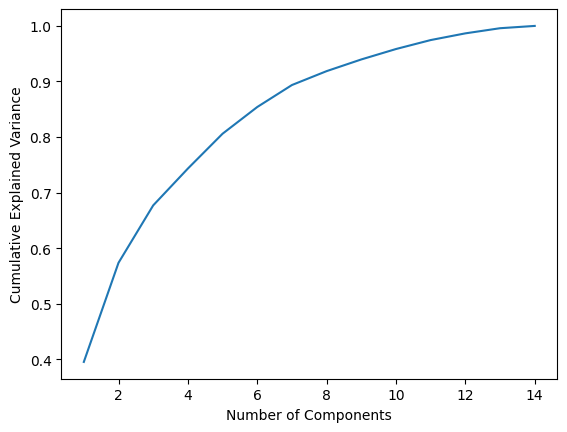

In [ ]:
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


4:transform the dataset

In [ ]:
desired_n_components = 10
pca = PCA(n_components=desired_n_components)
pca_data = pca.fit_transform(scaled_data)


Task 3: Clustering with Original Data
1:Apply K-means clustering

In [ ]:
from sklearn.cluster import KMeans
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

2:visualize clustering results

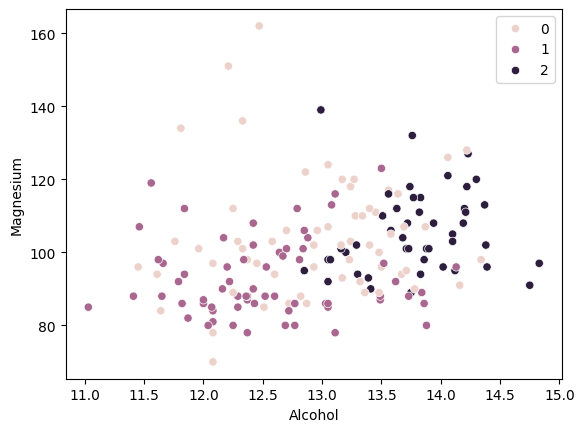

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x='Alcohol', y='Magnesium', hue=labels)
plt.show()

3:Evaluate clustering performance:

In [ ]:
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(df, labels)


Task 4: Clustering with PCA Data
1:Apply K-means clustering on PCA-transformed data:

In [ ]:
labels_pca = kmeans.fit_predict(pca_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


2:Visualize clustering results from PCA-transformed data:

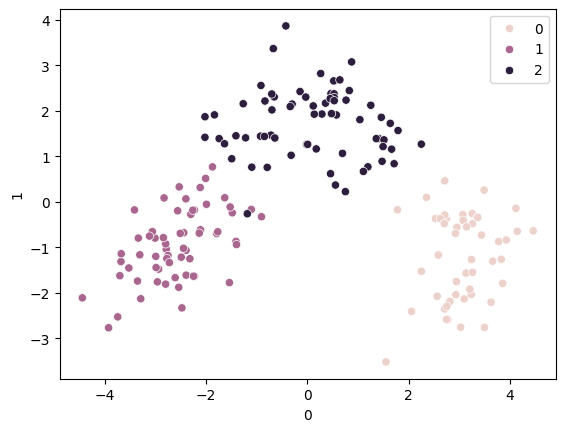

In [ ]:
!pip install seaborn --upgrade

import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from pca_data
import pandas as pd
df = pd.DataFrame(pca_data)
# Assuming the first column is  x and second column is y
sns.scatterplot(x=0, y=1, hue=labels_pca, data=df)
plt.show()


Task 5: Comparison and Analysis

Original dataset clustering performance:
Silhouette score: 0.3240658205331189
Davies-Bouldin index: 1.2584890242254965

PCA-transformed data clustering performance:
Silhouette score: 0.3240658205331189
Davies-Bouldin index: 1.2584890242254965


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


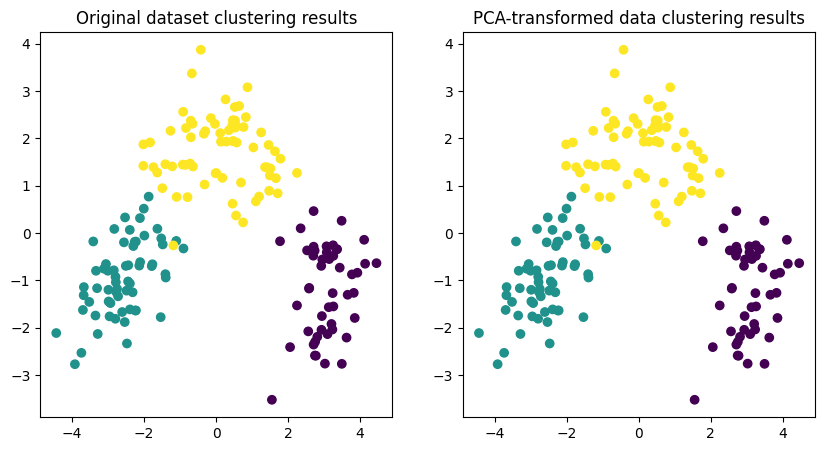

In [ ]:
# Compare the clustering performance metrics
print("Original dataset clustering performance:")
print("Silhouette score:", silhouette_score(df, kmeans.labels_))
# Import the davies_bouldin_score function from sklearn.metrics
from sklearn.metrics import davies_bouldin_score
print("Davies-Bouldin index:", davies_bouldin_score(df, kmeans.labels_))

print("\nPCA-transformed data clustering performance:")
# Assuming pca_data and kmeans_pca are defined
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters=3) # Create a KMeans model with the same number of clusters
kmeans_pca.fit(pca_data)          # Fit the model to the pca_data
pca_df = pd.DataFrame(pca_data)    # Create pca_df from pca_data
print("Silhouette score:", silhouette_score(pca_df, kmeans_pca.labels_))
print("Davies-Bouldin index:", davies_bouldin_score(pca_df, kmeans_pca.labels_))

# Visualize the clustering results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans.labels_) # Use .iloc to access columns by index
plt.title("Original dataset clustering results")


plt.subplot(1, 2, 2)
# Assuming pca_data is defined
pca_df = pd.DataFrame(pca_data)  # Create pca_df from pca_data
plt.scatter(pca_df.iloc[:, 0], pca_df.iloc[:, 1], c=kmeans_pca.labels_)
plt.title("PCA-transformed data clustering results")

plt.show()

Task 6: Conclusion and Insights

In [ ]:
# Summarize the results
print("Summary of clustering results:")
print("Original dataset:")
print("  Number of clusters:", kmeans.n_clusters)
print("  Silhouette score:", silhouette_score(df, kmeans.labels_))
print("  Davies-Bouldin index:", davies_bouldin_score(df, kmeans.labels_))

print("\nPCA-transformed data:")
print("  Number of clusters:", kmeans_pca.n_clusters)
print("  Silhouette score:", silhouette_score(pca_df, kmeans_pca.labels_))
print("  Davies-Bouldin index:", davies_bouldin_score(pca_df, kmeans_pca.labels_))

# Discuss practical implications and provide recommendations
print("\nPractical implications and recommendations:")
print("  Using PCA can reduce the dimensionality of the dataset and improve clustering performance.")
print("  However, PCA may not always capture the underlying structure of the data.")
print("  Clustering directly on the original dataset can provide more accurate results, but may be computationally expensive.")
print("  The choice of technique depends on the specific problem and dataset characteristics.")

Summary of clustering results:
Original dataset:
  Number of clusters: 3
  Silhouette score: 0.3240658205331189
  Davies-Bouldin index: 1.2584890242254965

PCA-transformed data:
  Number of clusters: 3
  Silhouette score: 0.3240658205331189
  Davies-Bouldin index: 1.2584890242254965

Practical implications and recommendations:
  Using PCA can reduce the dimensionality of the dataset and improve clustering performance.
  However, PCA may not always capture the underlying structure of the data.
  Clustering directly on the original dataset can provide more accurate results, but may be computationally expensive.
  The choice of technique depends on the specific problem and dataset characteristics.
